### How to Get File

1) On GO Term Finder website (http://geneontology.org) after running, click 'Table' next to 'Export'. <br>
2) Then, open the .txt file as an Excel file. <br>
3) Then, delete rows 1-11, and save as an Excel file.

### Inputs

In [1]:
path='~/Desktop/'
file_name='analysis-4.xlsx'
title_of_graph='GO Terms Gene Ontology Resource'

In [2]:
num_of_terms=10 #max = 20 ... from CCST paper = 10

### Pulling Terms and Making Figure

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel(path+file_name)

In [5]:
df=df.sort_values(by='upload_1 (raw P-value)', ascending=True)

In [6]:
terms=np.array(df.iloc[:,0][0:num_of_terms])
p_val=np.array(df.iloc[:,7][0:num_of_terms])

In [7]:
for i in range(len(terms)):
    terms[i],disposable_GO_terms=terms[i].split(' (')

In [8]:
for i in range(len(p_val)):
    p_val[i]=-np.log10(p_val[i])

In [9]:
terms_tup=tuple(terms.reshape(1, -1)[0])

In [10]:
x_axis=np.linspace(0,round(np.max(p_val)/10)*10,3)
x_axis_label=list()
for i in range(len(x_axis)):
    x_axis_label.append(int(x_axis[i]))

In [11]:
if num_of_terms<=10:
    colors=list(sns.color_palette('tab10').as_hex())
else:
    colors=list(sns.color_palette('tab20').as_hex())

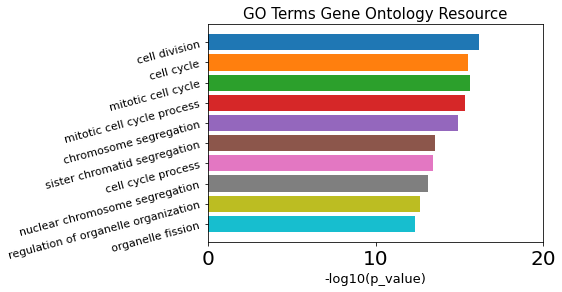

In [12]:
fig, ax = plt.subplots()

y_pos = np.arange(len(terms))


ax.barh(y_pos, p_val, align='center',color=colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(terms_tup,rotation=15,size=11)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xticks(x_axis)
ax.set_xticklabels(labels=x_axis_label,size=20)
ax.set_xlabel('-log10(p_value)',size=13)
ax.set_title(title_of_graph,size=15)

#plt.savefig(title_of_graph+'.png',dpi=200,bbox_inches='tight')
plt.show()